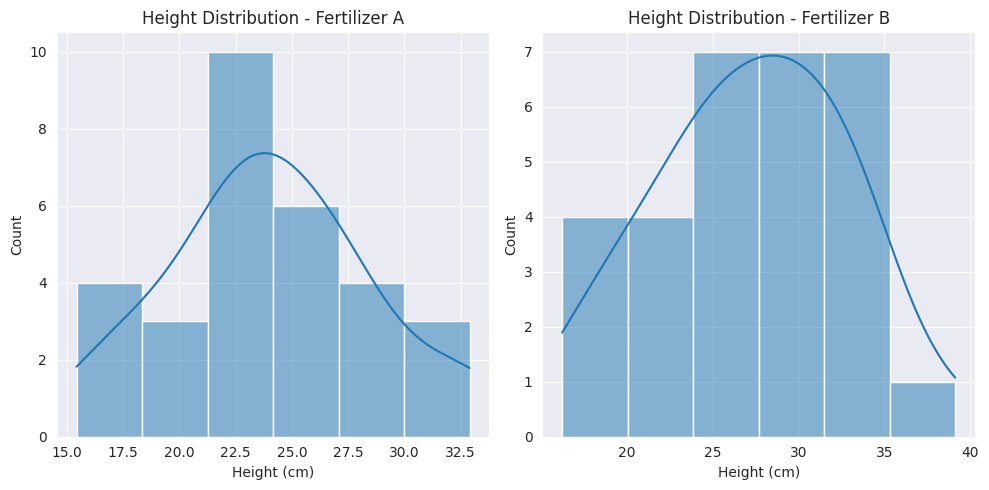


Levene's Test for Equal Variances:
  Levene Statistic: 2.0687
  P-value: 0.1557
  Variances are likely equal (fail to reject null hypothesis of equal variances).

Independent Samples t-test (assuming equal variances):
  T-statistic: -2.4538
  P-value: 0.0172

Significance Level (alpha): 0.05
  P-value < alpha: Reject the null hypothesis (H0).
  There is statistically significant evidence to suggest that the mean height of bean plants treated with Fertilizer A is different from the mean height of bean plants treated with Fertilizer B.


In [1]:
import numpy as np
from scipy import stats
import pandas as pd

# Simulate the data (replace with your actual data)
np.random.seed(42)  # for reproducibility
fertilizer_a_heights = np.random.normal(loc=25, scale=5, size=30)  # Mean 25 cm, std dev 5 cm
fertilizer_b_heights = np.random.normal(loc=28, scale=6, size=30)  # Mean 28 cm, std dev 6 cm

# Create a Pandas DataFrame for better organization (optional but helpful)
data = pd.DataFrame({
    'Fertilizer': ['A'] * len(fertilizer_a_heights) + ['B'] * len(fertilizer_b_heights),
    'Height (cm)': np.concatenate([fertilizer_a_heights, fertilizer_b_heights])
})

# Separate the data for the two groups
group_a = data[data['Fertilizer'] == 'A']['Height (cm)']
group_b = data[data['Fertilizer'] == 'B']['Height (cm)']

# --- Step 1: Check Assumptions (Important!) ---

# 1. Independence: We assume the plant heights within each group and between groups are independent.
# 2. Normality: We should check if the heights within each group are approximately normally distributed.
#    We can use visual methods (histograms, Q-Q plots) or normality tests (Shapiro-Wilk, Kolmogorov-Smirnov)
#    for each group separately.
# 3. Equal Variances (Homoscedasticity): We should check if the variances of the two groups are approximately equal.
#    We can use visual methods (box plots) or statistical tests like Levene's test or Bartlett's test.

# Let's quickly visualize for normality (you should do more rigorous checks)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.histplot(group_a, kde=True)
plt.title('Height Distribution - Fertilizer A')
plt.subplot(1, 2, 2)
sns.histplot(group_b, kde=True)
plt.title('Height Distribution - Fertilizer B')
plt.tight_layout()
plt.show()

# Let's quickly check for equal variances using Levene's test
levene_statistic, levene_p_value = stats.levene(group_a, group_b)
print(f"\nLevene's Test for Equal Variances:")
print(f"  Levene Statistic: {levene_statistic:.4f}")
print(f"  P-value: {levene_p_value:.4f}")

alpha = 0.05
if levene_p_value > alpha:
    print("  Variances are likely equal (fail to reject null hypothesis of equal variances).")
    equal_var = True
else:
    print("  Variances are likely unequal (reject null hypothesis of equal variances).")
    equal_var = False

# --- Step 2: Perform the Independent Samples t-test ---

# We use the independent samples t-test to compare the means of two independent groups.
# The choice of whether to assume equal variances depends on the Levene's test result.

if equal_var:
    t_statistic, p_value = stats.ttest_ind(group_a, group_b, equal_var=True)
    print("\nIndependent Samples t-test (assuming equal variances):")
else:
    t_statistic, p_value = stats.ttest_ind(group_a, group_b, equal_var=False)
    print("\nIndependent Samples t-test (not assuming equal variances - Welch's t-test):")

print(f"  T-statistic: {t_statistic:.4f}")
print(f"  P-value: {p_value:.4f}")

# --- Step 3: Interpret the Results ---

alpha = 0.05  # Significance level

print(f"\nSignificance Level (alpha): {alpha}")

if p_value < alpha:
    print("  P-value < alpha: Reject the null hypothesis (H0).")
    print("  There is statistically significant evidence to suggest that the mean height of bean plants treated with Fertilizer A is different from the mean height of bean plants treated with Fertilizer B.")
else:
    print("  P-value >= alpha: Fail to reject the null hypothesis (H0).")
    print("  There is not enough statistically significant evidence to suggest that the mean height of bean plants treated with Fertilizer A is different from the mean height of bean plants treated with Fertilizer B.")